In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spec_flats as sf

## Initialize butler and set up observation year to find flats 

In [2]:
repo = '/repo/embargo'
calibCollections=['LATISS/calib/legacy','LATISS/raw/all']
obs_year = 2024
filter = 'SDSSr_65mm'
disperser = 'empty'

In [3]:
outdir = './paper/'
if os.path.exists(outdir)==False:
    os.mkdir(outdir)

In [4]:
flat_dates, flat_ids, butler = sf.find_flat_dates(obs_year=obs_year,filter=filter,disperser=disperser,repo=repo,calibCollections=calibCollections)

In [5]:
flat_dates

array([20240129, 20240131, 20240201, 20240207, 20240212, 20240216,
       20240219, 20240220, 20240221, 20240222, 20240223, 20240226,
       20240227, 20240228, 20240301, 20240303, 20240305, 20240306,
       20240308, 20240311, 20240326, 20240327, 20240328, 20240329,
       20240401, 20240402, 20240403, 20240404, 20240408, 20240409,
       20240410, 20240415, 20240416, 20240417, 20240419, 20240422,
       20240423, 20240424, 20240429, 20240524, 20240527, 20240528,
       20240529, 20240530, 20240603, 20240611, 20240618, 20240619,
       20240624, 20240625, 20240626, 20240627, 20240703, 20240708,
       20240709, 20240710, 20240716, 20240717, 20240722, 20240723,
       20240724, 20240726, 20240729, 20240730, 20240731, 20240801,
       20240806, 20240807])

In [6]:
#flat_ids

### Find closest date 

In [7]:
closest_date, closest_ids = sf.find_closest_date(20240417,flat_ids)

Requested observation date =  20240417
Closest date available =  20240417
Corresponding flat IDs =  [2024041700049 2024041700050 2024041700051 2024041700052 2024041700053
 2024041700054 2024041700055 2024041700056 2024041700057 2024041700058
 2024041700059 2024041700060 2024041700061 2024041700062 2024041700063
 2024041700064 2024041700065 2024041700066 2024041700067 2024041700068
 2024041700069 2024041700186 2024041700187 2024041700188 2024041700189
 2024041700190 2024041700191 2024041700192 2024041700193 2024041700194
 2024041700195 2024041700196 2024041700197 2024041700198 2024041700199
 2024041700200 2024041700201 2024041700202 2024041700203 2024041700204
 2024041700205 2024041700206 2024041700207 2024041700208 2024041700209
 2024041700210 2024041700211 2024041700212 2024041700213 2024041700214
 2024041700215 2024041700216 2024041700217 2024041700218 2024041700219
 2024041700220 2024041700221 2024041700222 2024041700223 2024041700224
 2024041700225 2024041700226 2024041700227 20240

### Check that the flats of a given date can be loaded 

In [8]:
#sf.check_flats(closest_ids,return_flats=False,butler=butler,calibCollections=calibCollections)

### Select a flat by ID and plot it 

In [9]:
#flat_id0 = 2024041700090 #SDSSg_65mm
#flat_id0 = 2024041700217 #SDSS_r_65mm
#flat_id0 = 2024041700119 #SDSSz_65mm
flat_id0 = 2024041700177 #empty

In [10]:
flat_array_ = sf.get_flat_array(flat_id0,butler=butler)

Flat 2024041700177 properly loaded


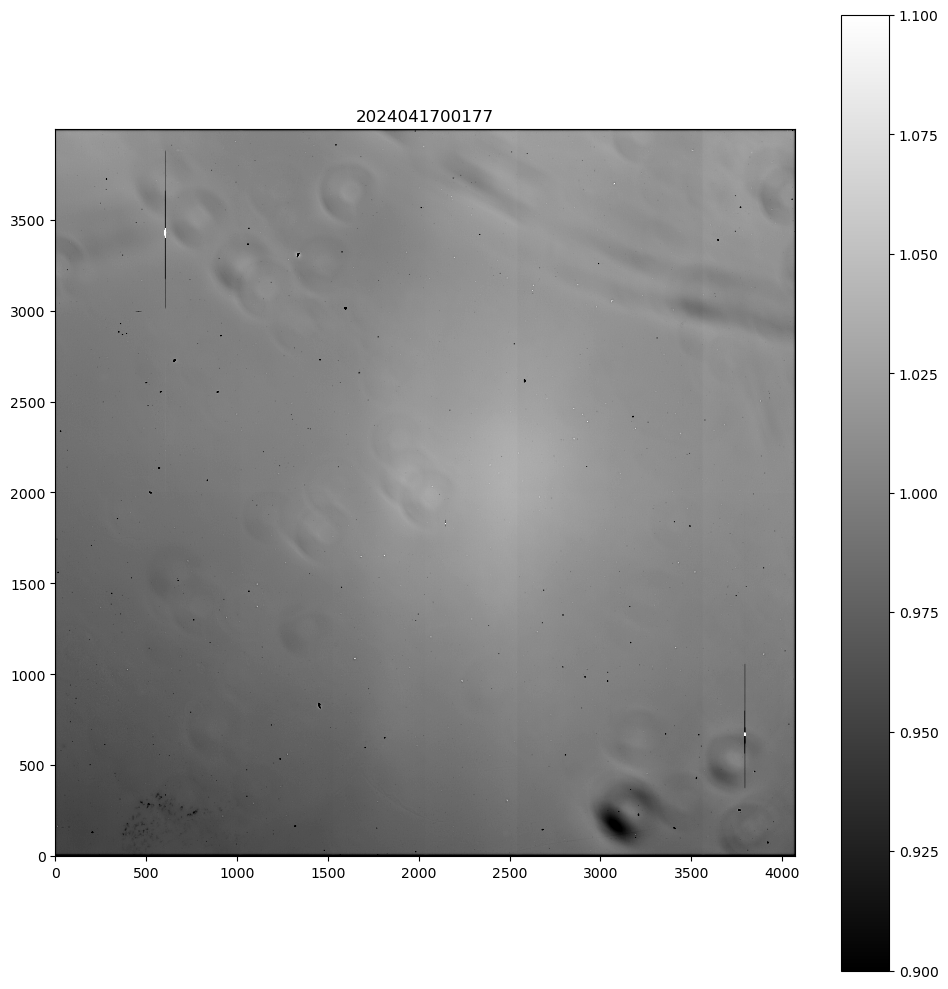

In [11]:
sf.plot_flat(flat_array_,title=flat_id0)

## Now we use the auxtel_flat class 

### We create an auxtel_flat object for a given flat ID 
We can reuse the butler that we initialized above or set up a different one 

In [12]:
myflat = sf.auxtel_flat(flat_id0,butler=butler)

In [13]:
if myflat.metadata['FILTER']!=filter:
    print(myflat.metadata['FILTER'])

empty_1


In [14]:
myflat.flat_array

array([[0.53261137, 0.5218164 , 0.51592493, ..., 0.53400564, 0.5375086 ,
        0.5509224 ],
       [0.68747383, 0.6848589 , 0.6835276 , ..., 0.6884202 , 0.69494134,
        0.6908289 ],
       [0.74667263, 0.7571097 , 0.75711197, ..., 0.7621511 , 0.7725817 ,
        0.7493886 ],
       ...,
       [0.80247664, 0.80738056, 0.8149901 , ..., 0.8246341 , 0.8053092 ,
        0.79714435],
       [0.7303134 , 0.73359483, 0.7336715 , ..., 0.74042547, 0.74627215,
        0.73548347],
       [0.5757691 , 0.566827  , 0.5558483 , ..., 0.5701016 , 0.5729723 ,
        0.590216  ]], dtype=float32)

### Plot flat with plot_flat() method 

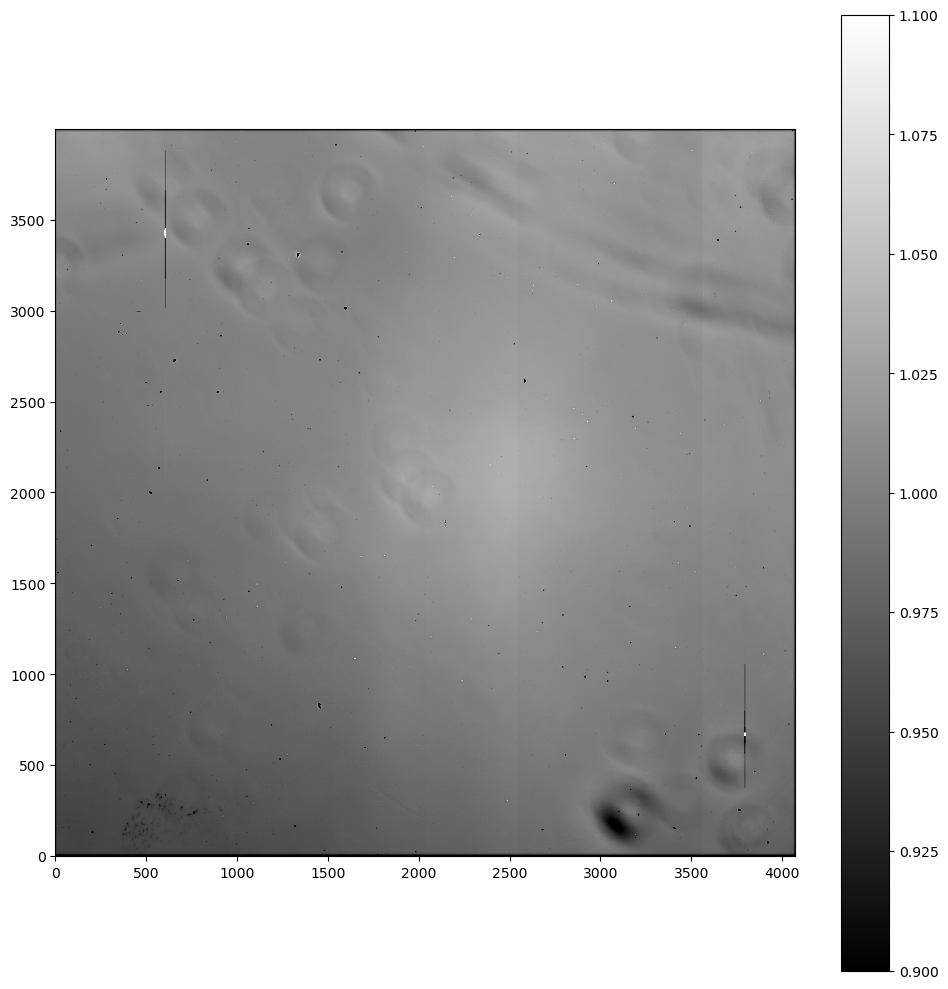

In [15]:
myflat.plot_flat()

### Check some atributes of the auxtel_flat object 

In [16]:
myflat.amplis_coords_all

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

In [17]:
myflat.amplis_coords

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

In [18]:
flat_array = myflat.flat_array
flat_array.shape

(4000, 4072)

In [31]:
x0ampli = myflat.amplis_coords['C03'][0]
x1ampli = myflat.amplis_coords['C03'][1]
y0ampli = myflat.amplis_coords['C03'][2]
y1ampli = myflat.amplis_coords['C13'][3]

print(x0ampli,x1ampli,y0ampli,y1ampli)
flat_array_small = flat_array[y0ampli:y1ampli,x0ampli:x1ampli]

1527 2036 0 4000


In [126]:
x0dust0 = 1560
x1dust0 = 1690
x0dust1 = 1690
x1dust1 = 1800
x0clean = 1800
x1clean = 1900
y0 = 3600
y1 = 3710

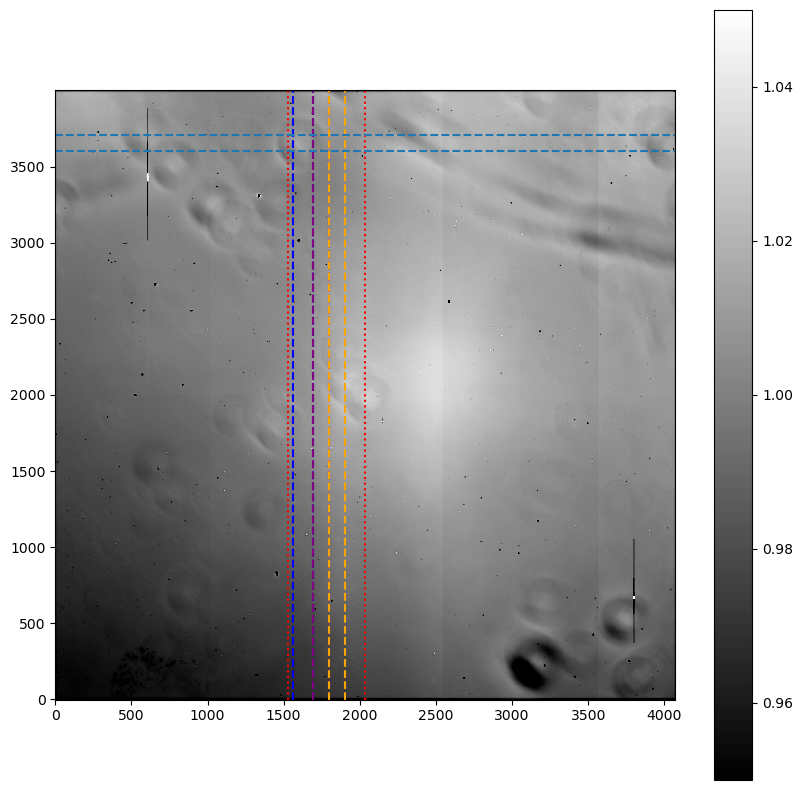

In [142]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(flat_array,cmap="gray",origin='lower',vmin=0.95,vmax=1.05)
fig.colorbar(im,ax=ax)
ax.axvline(x=x0ampli,ls=':',color='r')
ax.axvline(x=x1ampli,ls=':',color='r')
ax.axvline(x=x0dust0,ls='--',color='b')
ax.axvline(x=x1dust0,ls='--',color='b')
ax.axvline(x=x0dust1,ls='--',color='purple')
ax.axvline(x=x1dust1,ls='--',color='purple')
ax.axvline(x=x0clean,ls='--',color='orange')
ax.axvline(x=x1clean,ls='--',color='orange')
ax.axhline(y=y0,ls='--')
ax.axhline(y=y1,ls='--')

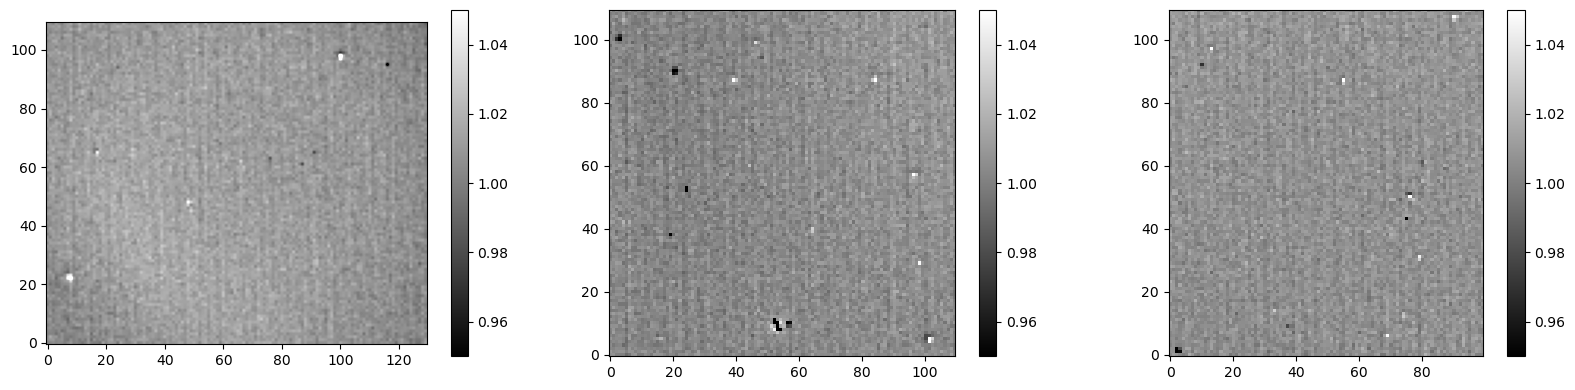

In [143]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(131)
im = ax1.imshow(flat_array[y0:y1,x0dust0:x1dust0],cmap="gray",origin='lower',vmin=0.95,vmax=1.05)
fig.colorbar(im,ax=ax1)
ax2 = fig.add_subplot(132)
im = ax2.imshow(flat_array[y0:y1,x0dust1:x1dust1],cmap="gray",origin='lower',vmin=0.95,vmax=1.05)
fig.colorbar(im,ax=ax2)
ax3 = fig.add_subplot(133)
im = ax3.imshow(flat_array[y0:y1,x0clean:x1clean],cmap="gray",origin='lower',vmin=0.95,vmax=1.05)
fig.colorbar(im,ax=ax3)
plt.tight_layout()

In [144]:
clean_array = flat_array[y0:y1,x0clean:x1clean]
dust0_array = flat_array[y0:y1,x0dust0:x1dust0]
dust1_array = flat_array[y0:y1,x0dust1:x1dust1]
print(clean_array.shape,dust0_array.shape,dust1_array.shape)

(110, 100) (110, 130) (110, 110)


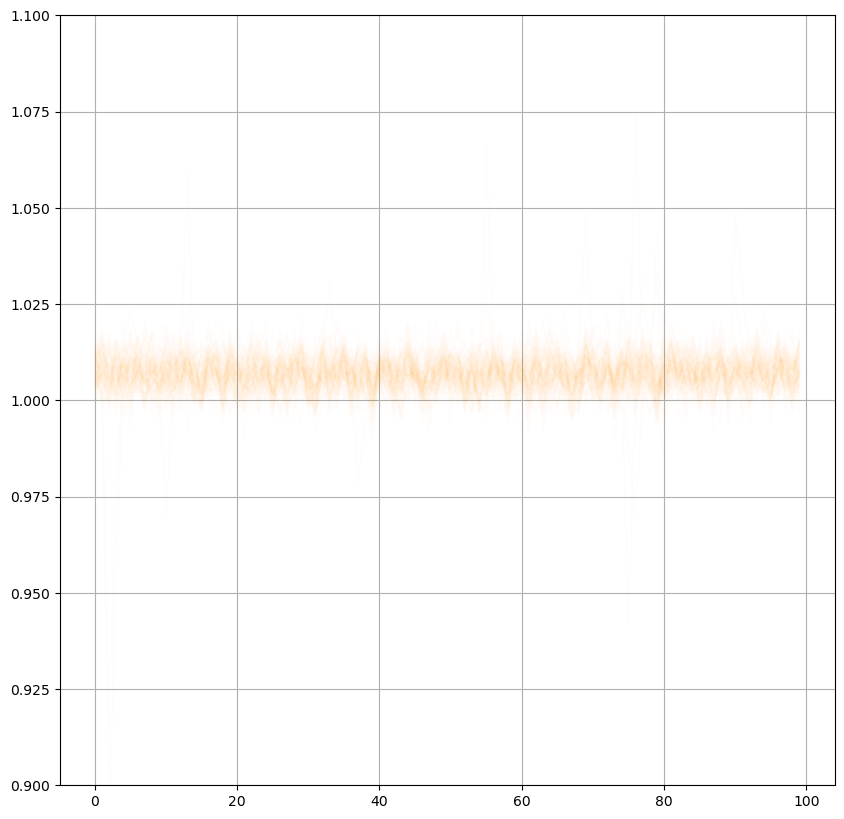

In [148]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for row_ in range(clean_array.shape[0]):
    ax.plot(range(clean_array.shape[1]),clean_array[row_,:],color='orange',alpha=0.01)
ax.set_ylim(0.9,1.1)
ax.grid()


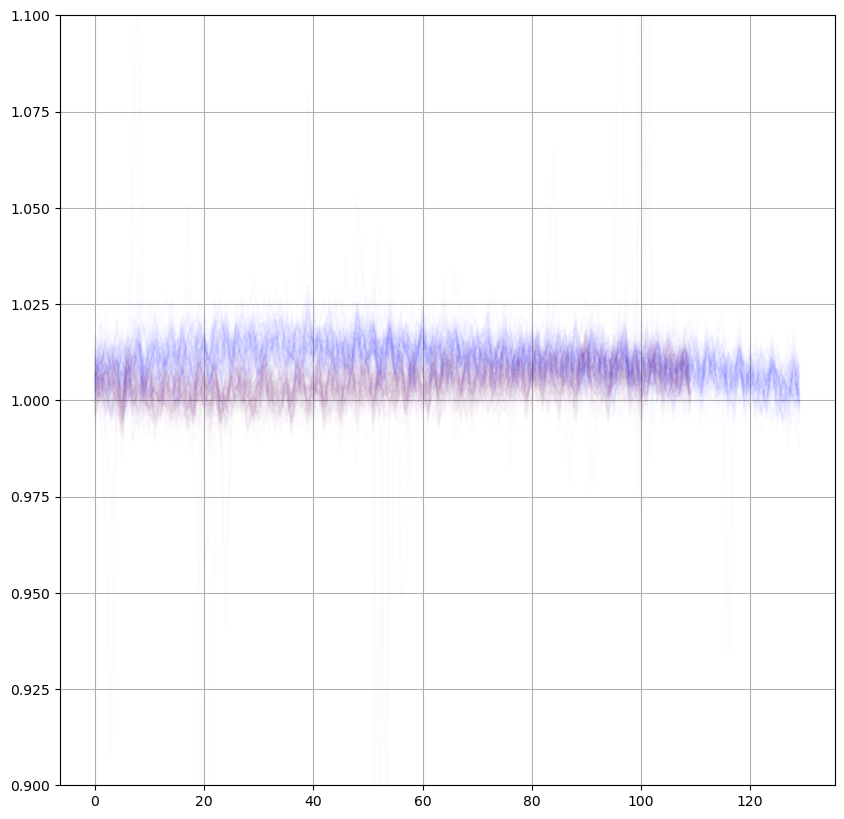

In [149]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for row_ in range(dust0_array.shape[0]):
    ax.plot(range(dust0_array.shape[1]),dust0_array[row_,:],color='b',alpha=0.01)
    ax.plot(range(dust1_array.shape[1]),dust1_array[row_,:],color='purple',alpha=0.01)
ax.set_ylim(0.9,1.1)
ax.grid()

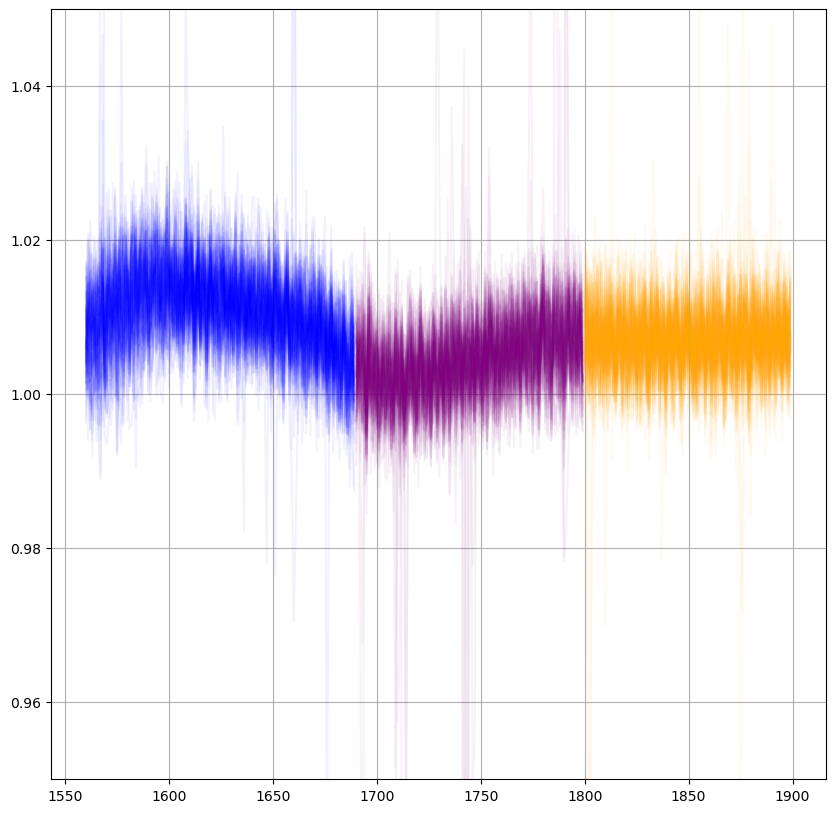

In [167]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for row_ in range(dust0_array.shape[0]):
    ax.plot(range(x0dust0,x1dust0),dust0_array[row_,:],color='b',alpha=0.05)
    ax.plot(range(x0dust1,x1dust1),dust1_array[row_,:],color='purple',alpha=0.05)
    ax.plot(range(x0clean,x1clean),clean_array[row_,:],color='orange',alpha=0.05)
ax.set_ylim(0.95,1.05)
ax.grid()

In [164]:
dust0_median = np.median(dust0_array,axis=0)
dust1_median = np.median(dust1_array,axis=0)
clean_median = np.median(clean_array,axis=0)

print(dust0_median.shape,dust1_median.shape,clean_median.shape)

(130,) (110,) (100,)


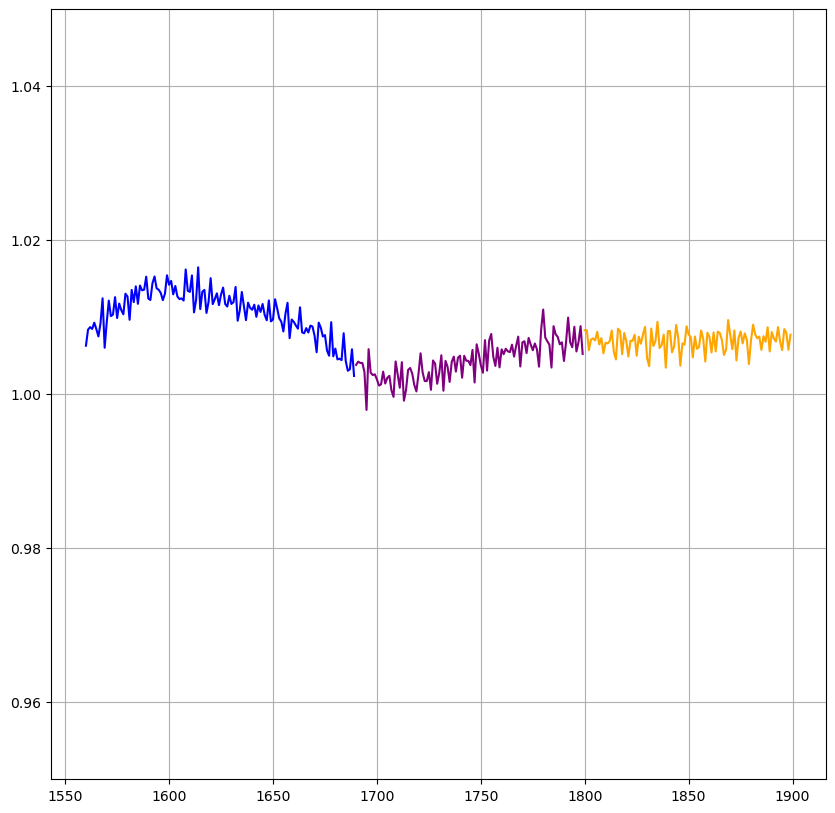

In [168]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(range(x0dust0,x1dust0),dust0_median,color='b')
ax.plot(range(x0dust1,x1dust1),dust1_median,color='purple')
ax.plot(range(x0clean,x1clean),clean_median,color='orange')
ax.set_ylim(0.95,1.05)
ax.grid()

### Now we select our implifiers of interest 

In [27]:
myflat.select_amplis()

In [28]:
myflat.amplis

['C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C07',
 'C06',
 'C05',
 'C04',
 'C03',
 'C02',
 'C01',
 'C00']

In [29]:
myflat.amplis_coords

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

In [30]:
myflat.amplis_coords_all

{'C10': (0, 509, 2000, 4000),
 'C11': (509, 1018, 2000, 4000),
 'C12': (1018, 1527, 2000, 4000),
 'C13': (1527, 2036, 2000, 4000),
 'C14': (2036, 2545, 2000, 4000),
 'C15': (2545, 3054, 2000, 4000),
 'C16': (3054, 3563, 2000, 4000),
 'C17': (3563, 4072, 2000, 4000),
 'C07': (3563, 4072, 0, 2000),
 'C06': (3054, 3563, 0, 2000),
 'C05': (2545, 3054, 0, 2000),
 'C04': (2036, 2545, 0, 2000),
 'C03': (1527, 2036, 0, 2000),
 'C02': (1018, 1527, 0, 2000),
 'C01': (509, 1018, 0, 2000),
 'C00': (0, 509, 0, 2000)}

### We can also normalize the flat 

Each amplifier is normalized by its median separately 

In [31]:
myflat.normalize_flat()

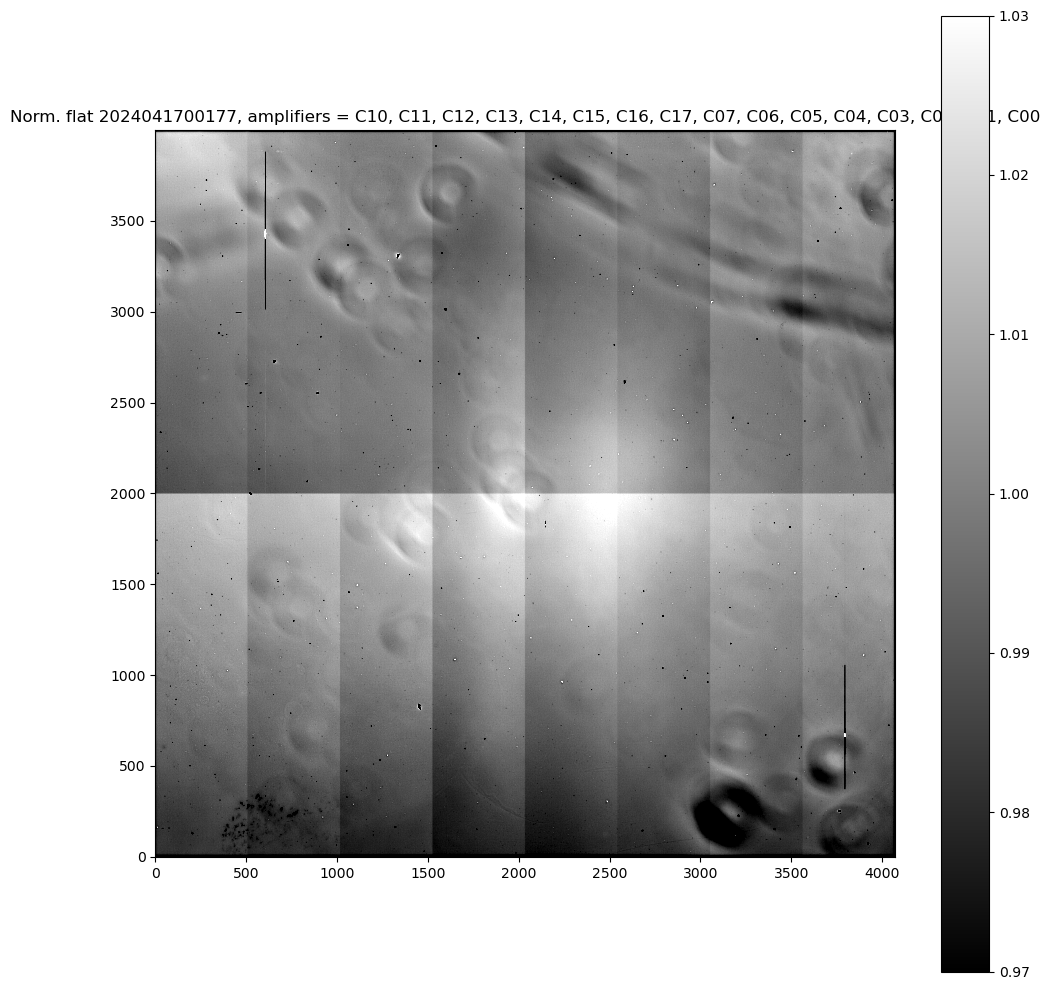

In [32]:
myflat.plot_flat(show="norm",vmin=0.97,vmax=1.03)

### We can also create a smoothed flat 

This is independent of the normalizing step, that is, we can do it even if we haven't done myflat.normalize_flat(), it will be done internally by default (normalize = True, very fast operation) 

In [33]:
myflat.smooth_flat(window_size=10,mode='mirror')

Window size for mean smoothing = 10
Smoothing with mean filter
Masking outliers beyond 1.00 and 99.00 percentiles
Time for smoothing = 1.3075s


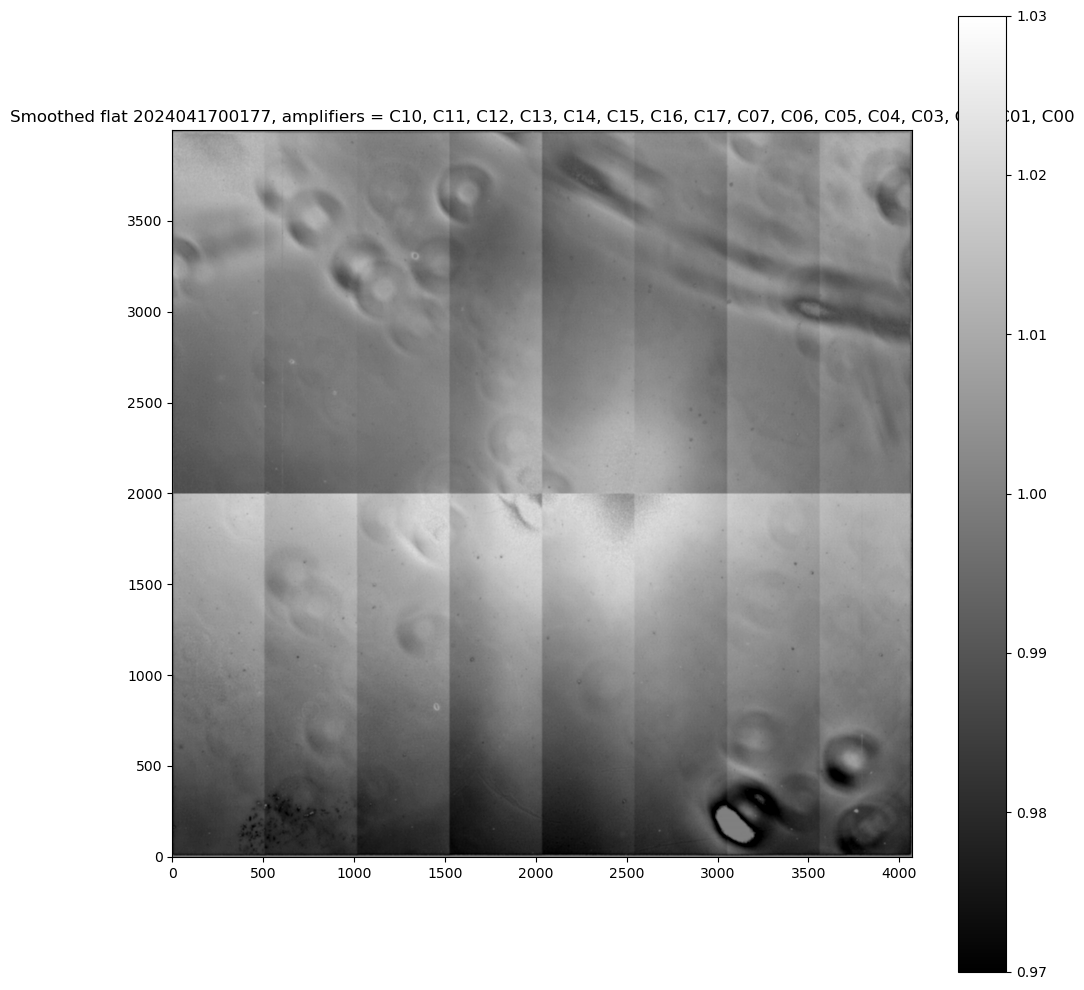

In [34]:
%matplotlib inline
myflat.plot_flat(show="smooth",vmin=0.97,vmax=1.03)

In [35]:
myflat.smooth_array

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [36]:
ws = [10,20,30,40,50]

In [37]:
'''
for ws_ in ws:
    myflat.smooth_flat(window_size=ws_)
    sf.plot_flat(myflat.smooth_array,vmin=0.97,vmax=1.03)
'''

'\nfor ws_ in ws:\n    myflat.smooth_flat(window_size=ws_)\n    sf.plot_flat(myflat.smooth_array,vmin=0.97,vmax=1.03)\n'

### Finally, we can create a spectroscopy or *special* flat 

This is also independent of the steps above: if myflat.smooth_array was not generated with myflat.smooth_flat, it will be done internally 

In [38]:
myflat.special_flat(window_size=10)

Window size for mean smoothing = 10
Smoothing with mean filter
Masking outliers beyond 1.00 and 99.00 percentiles
Time for smoothing = 0.8894s
Window size for mean smoothing = 10
Window size for mean smoothing = 10
Using previously created smooth array


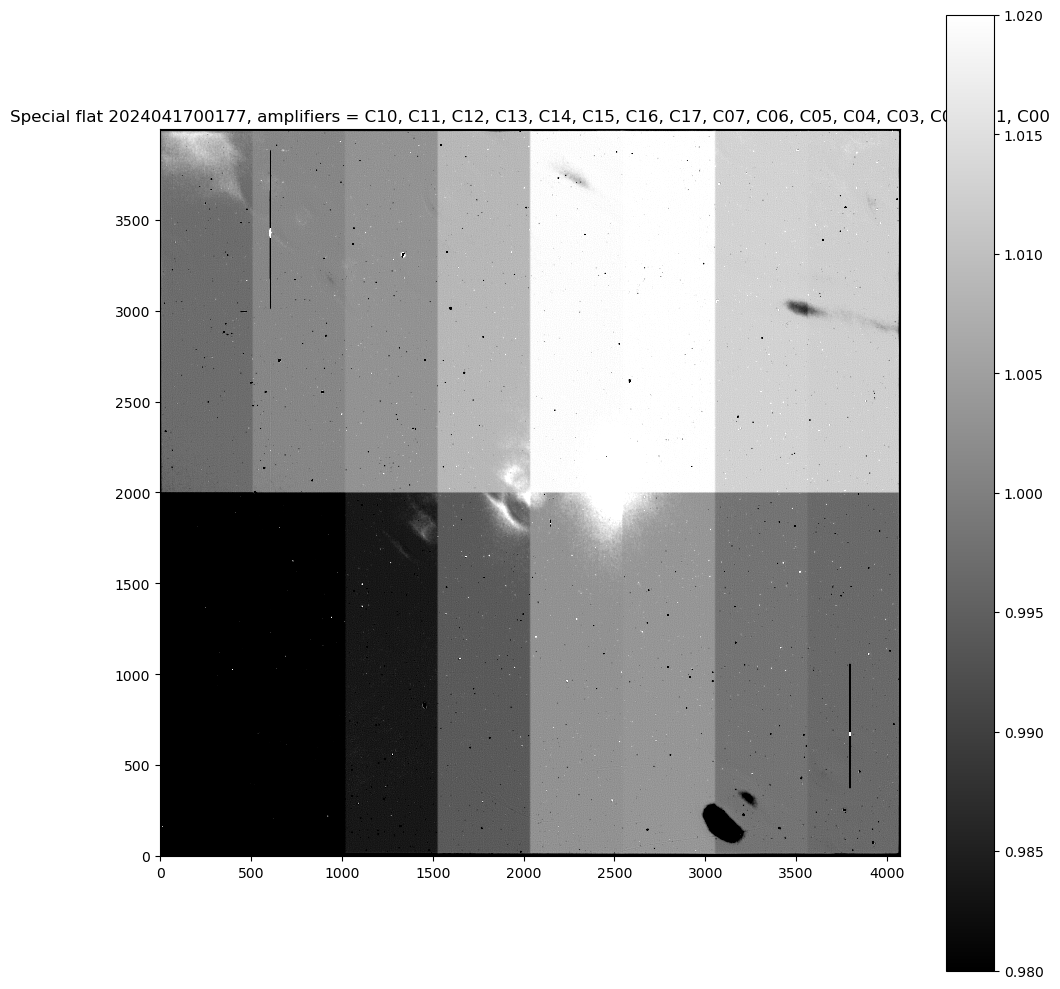

In [39]:
myflat.plot_flat(show="special",vmin=0.98,vmax=1.02)

In [40]:
outfile = 'special_flat_{0}_kernel_{1}_ws{2}_{3}-{4}.fits'.format(myflat.flat_id,myflat.kernel,myflat.window_size,filter,disperser)

In [41]:
myflat.save('special',outfile,outdir)

>>>>  output filename special_flat_2024041700177_kernel_mean_ws10_empty-empty.fits


In [42]:
from astropy.io import fits
import matplotlib.pyplot as plt

In [43]:
saved_flat = fits.open(os.path.join(outdir,outfile))

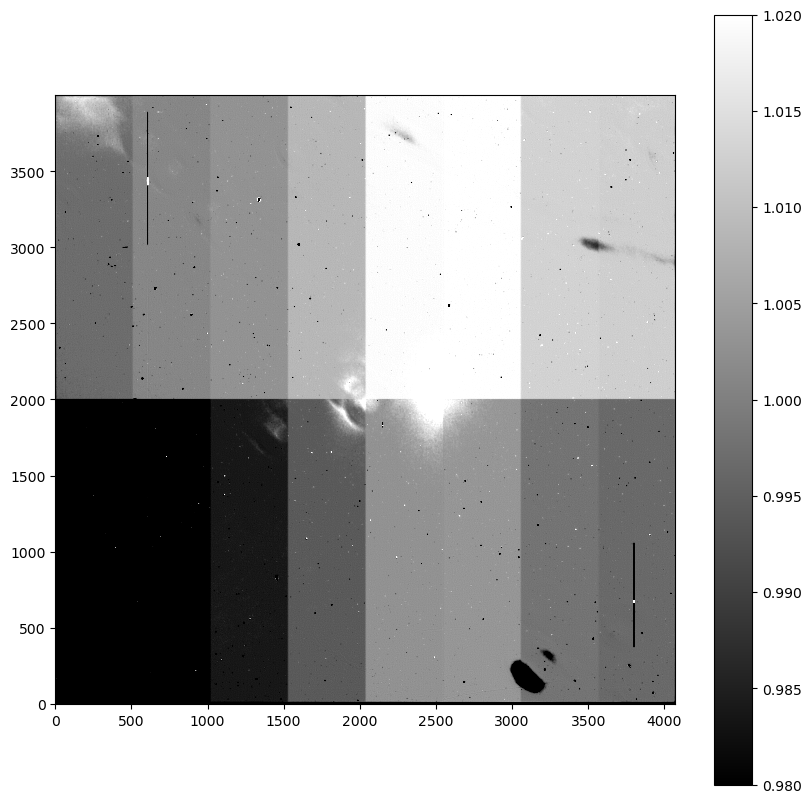

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
im = ax.imshow(saved_flat[1].data,cmap="gray",origin='lower',vmin=0.98,vmax=1.02)
fig.colorbar(im,ax=ax)

In [45]:
saved_flat[1].data.shape

(4000, 4072)